In [95]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
import scienceplots

def smooth(array, window_size=5):
    if len(array) < window_size:
        return array  # Not enough data to smooth, return as is
    smoothed = np.convolve(array, np.ones(window_size) / window_size, mode='valid')
    return smoothed

## Compare adding the fifth edge (orientation relation in pair of nearby edge) under different ratio

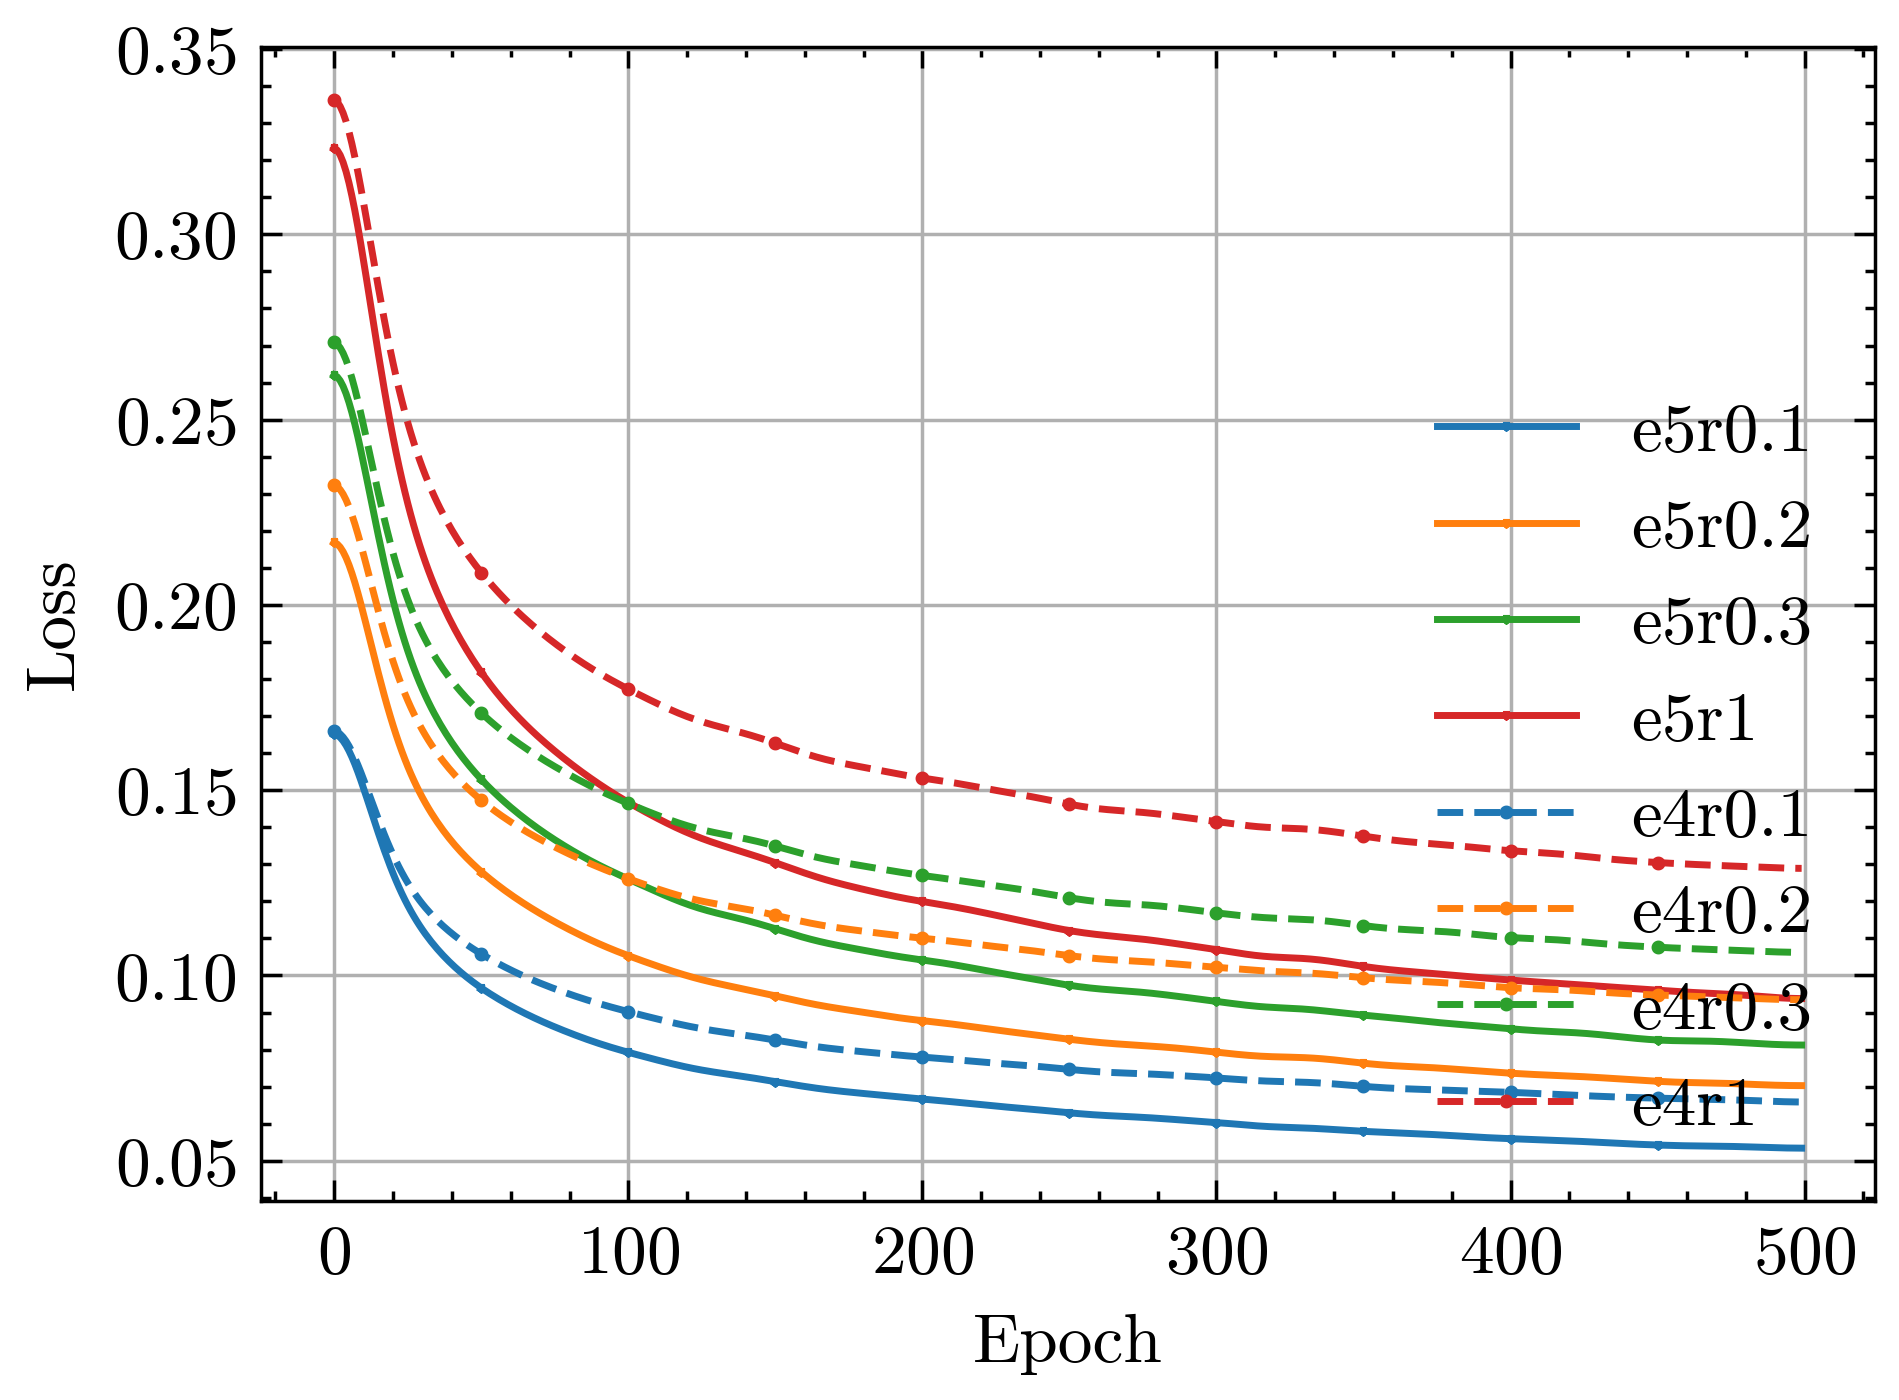

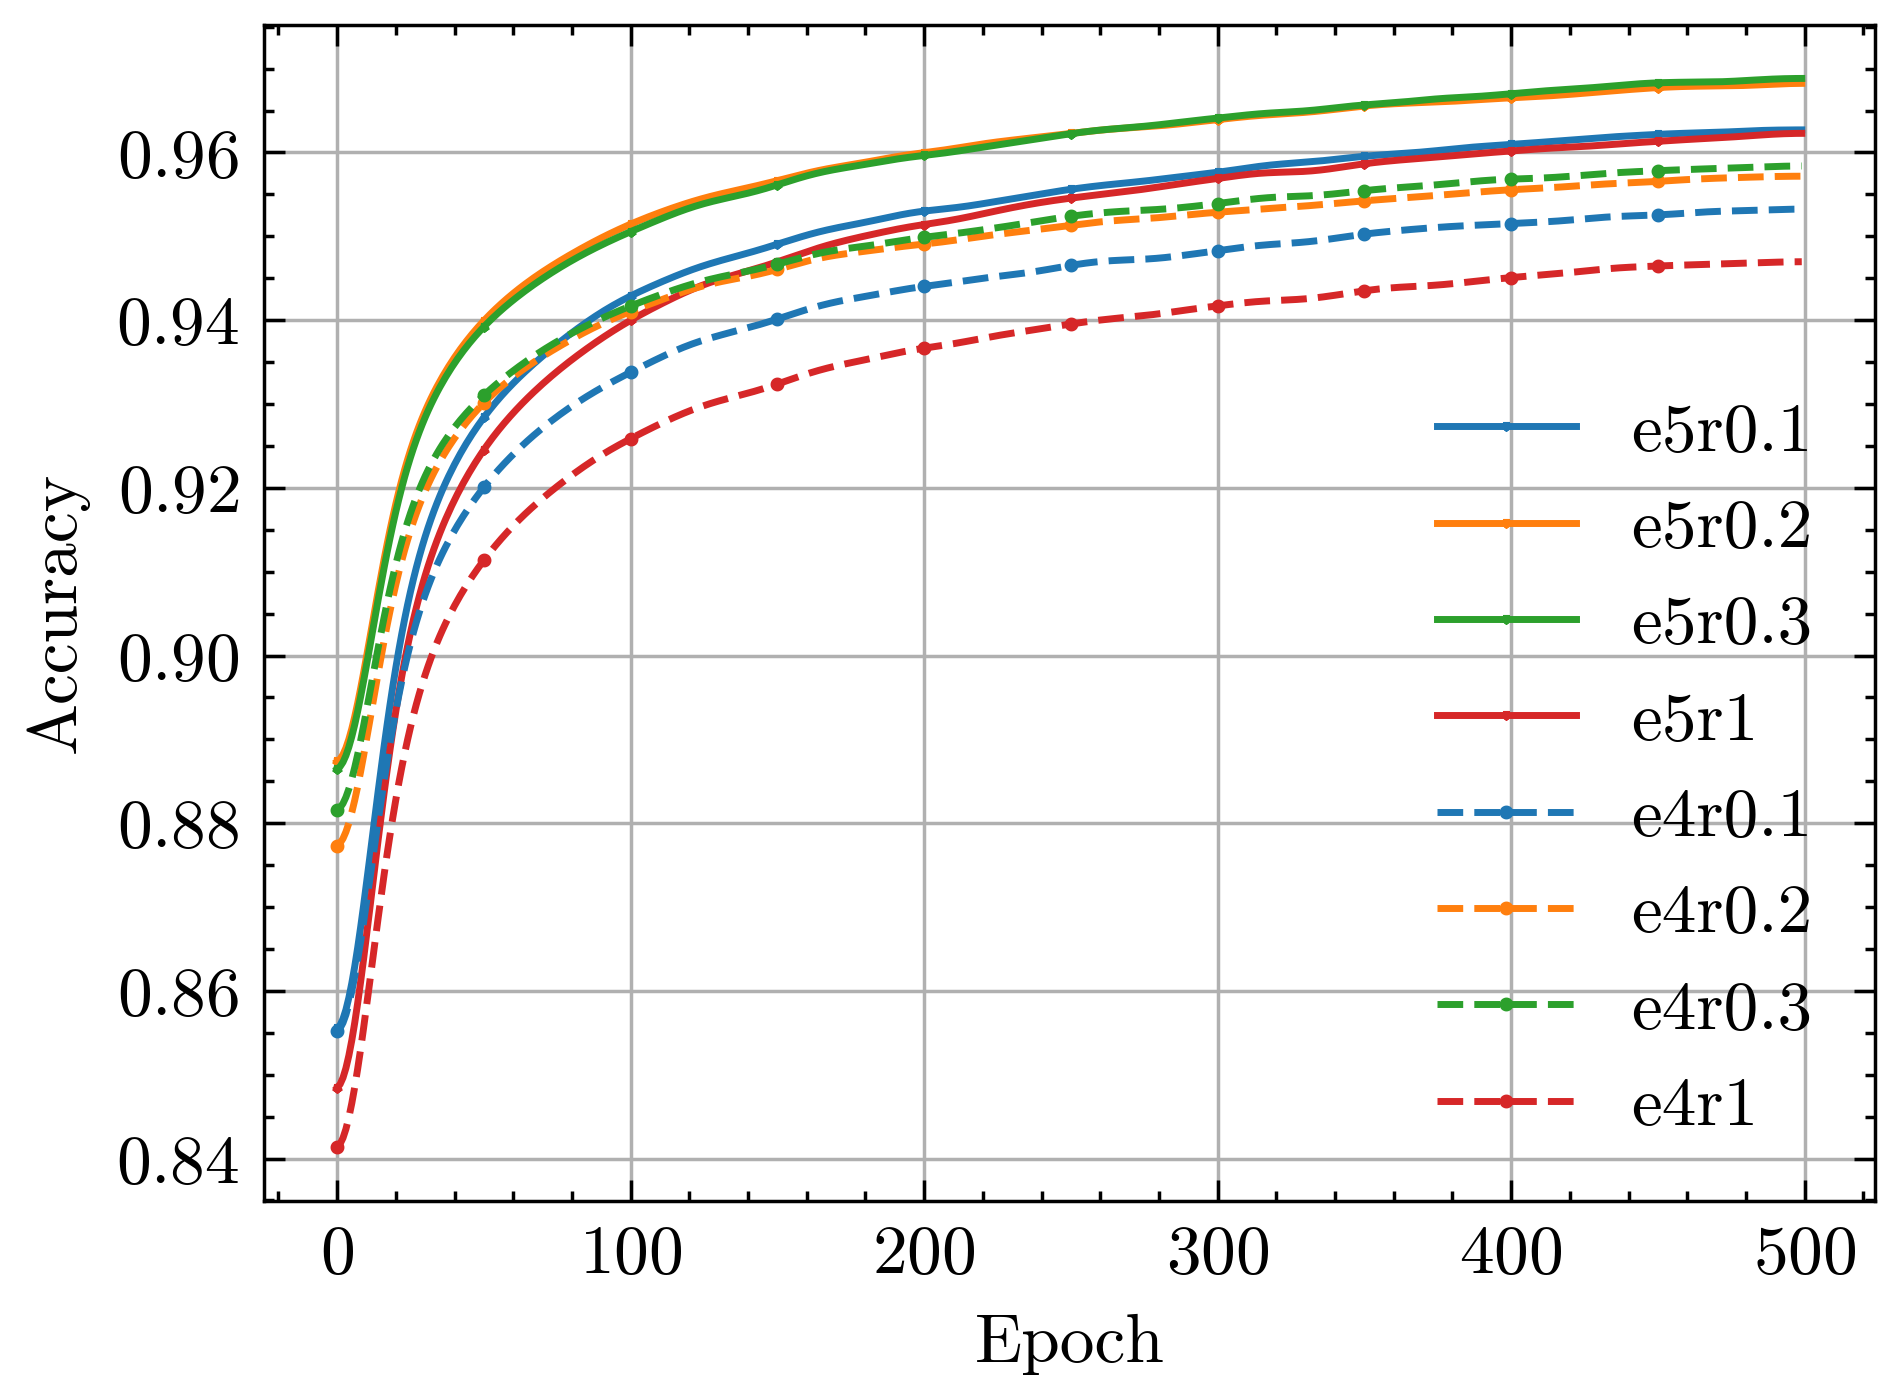

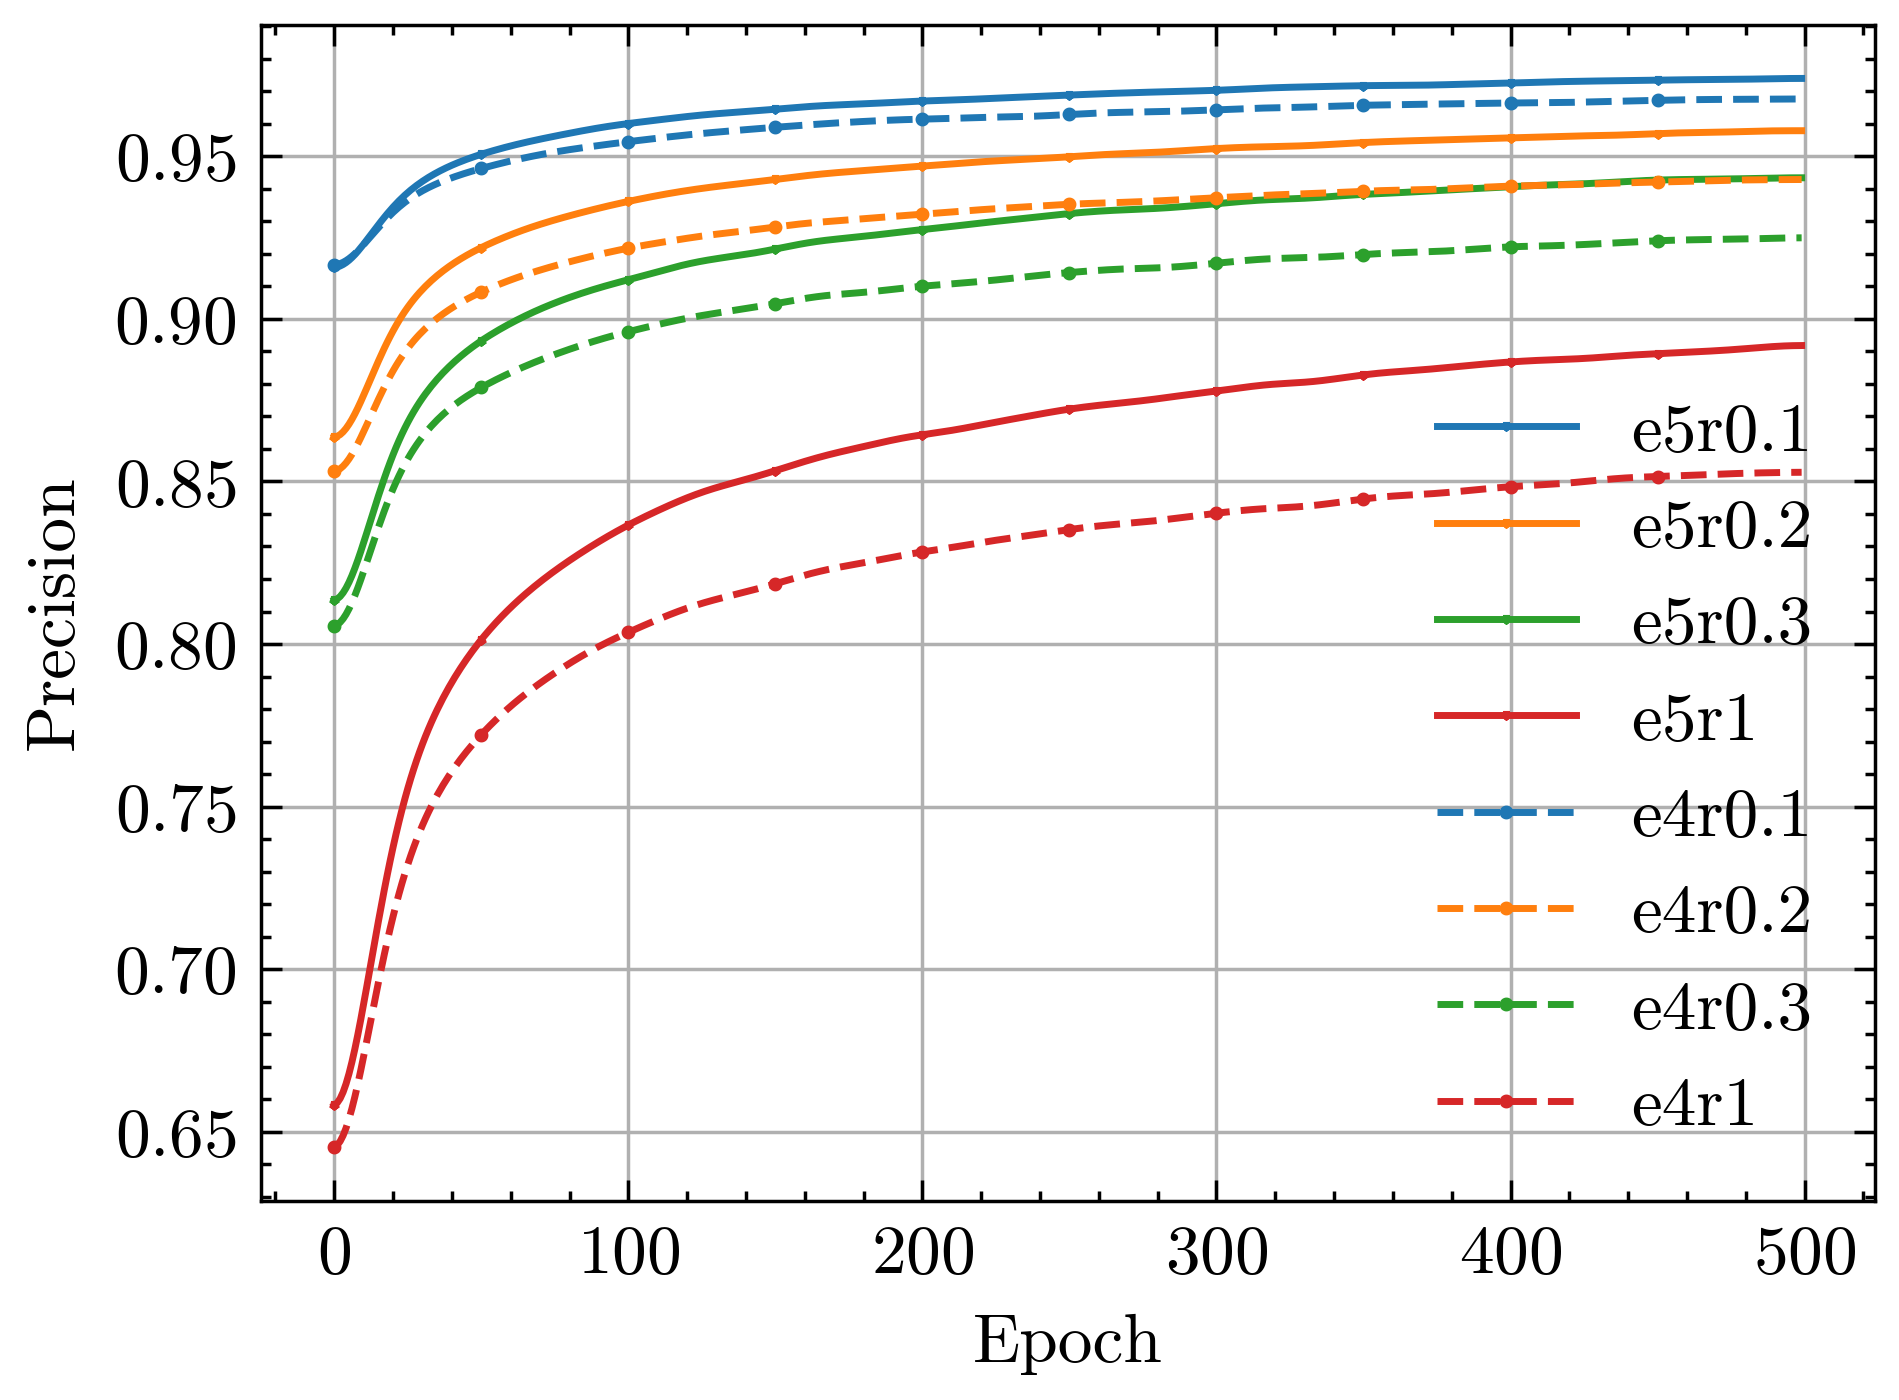

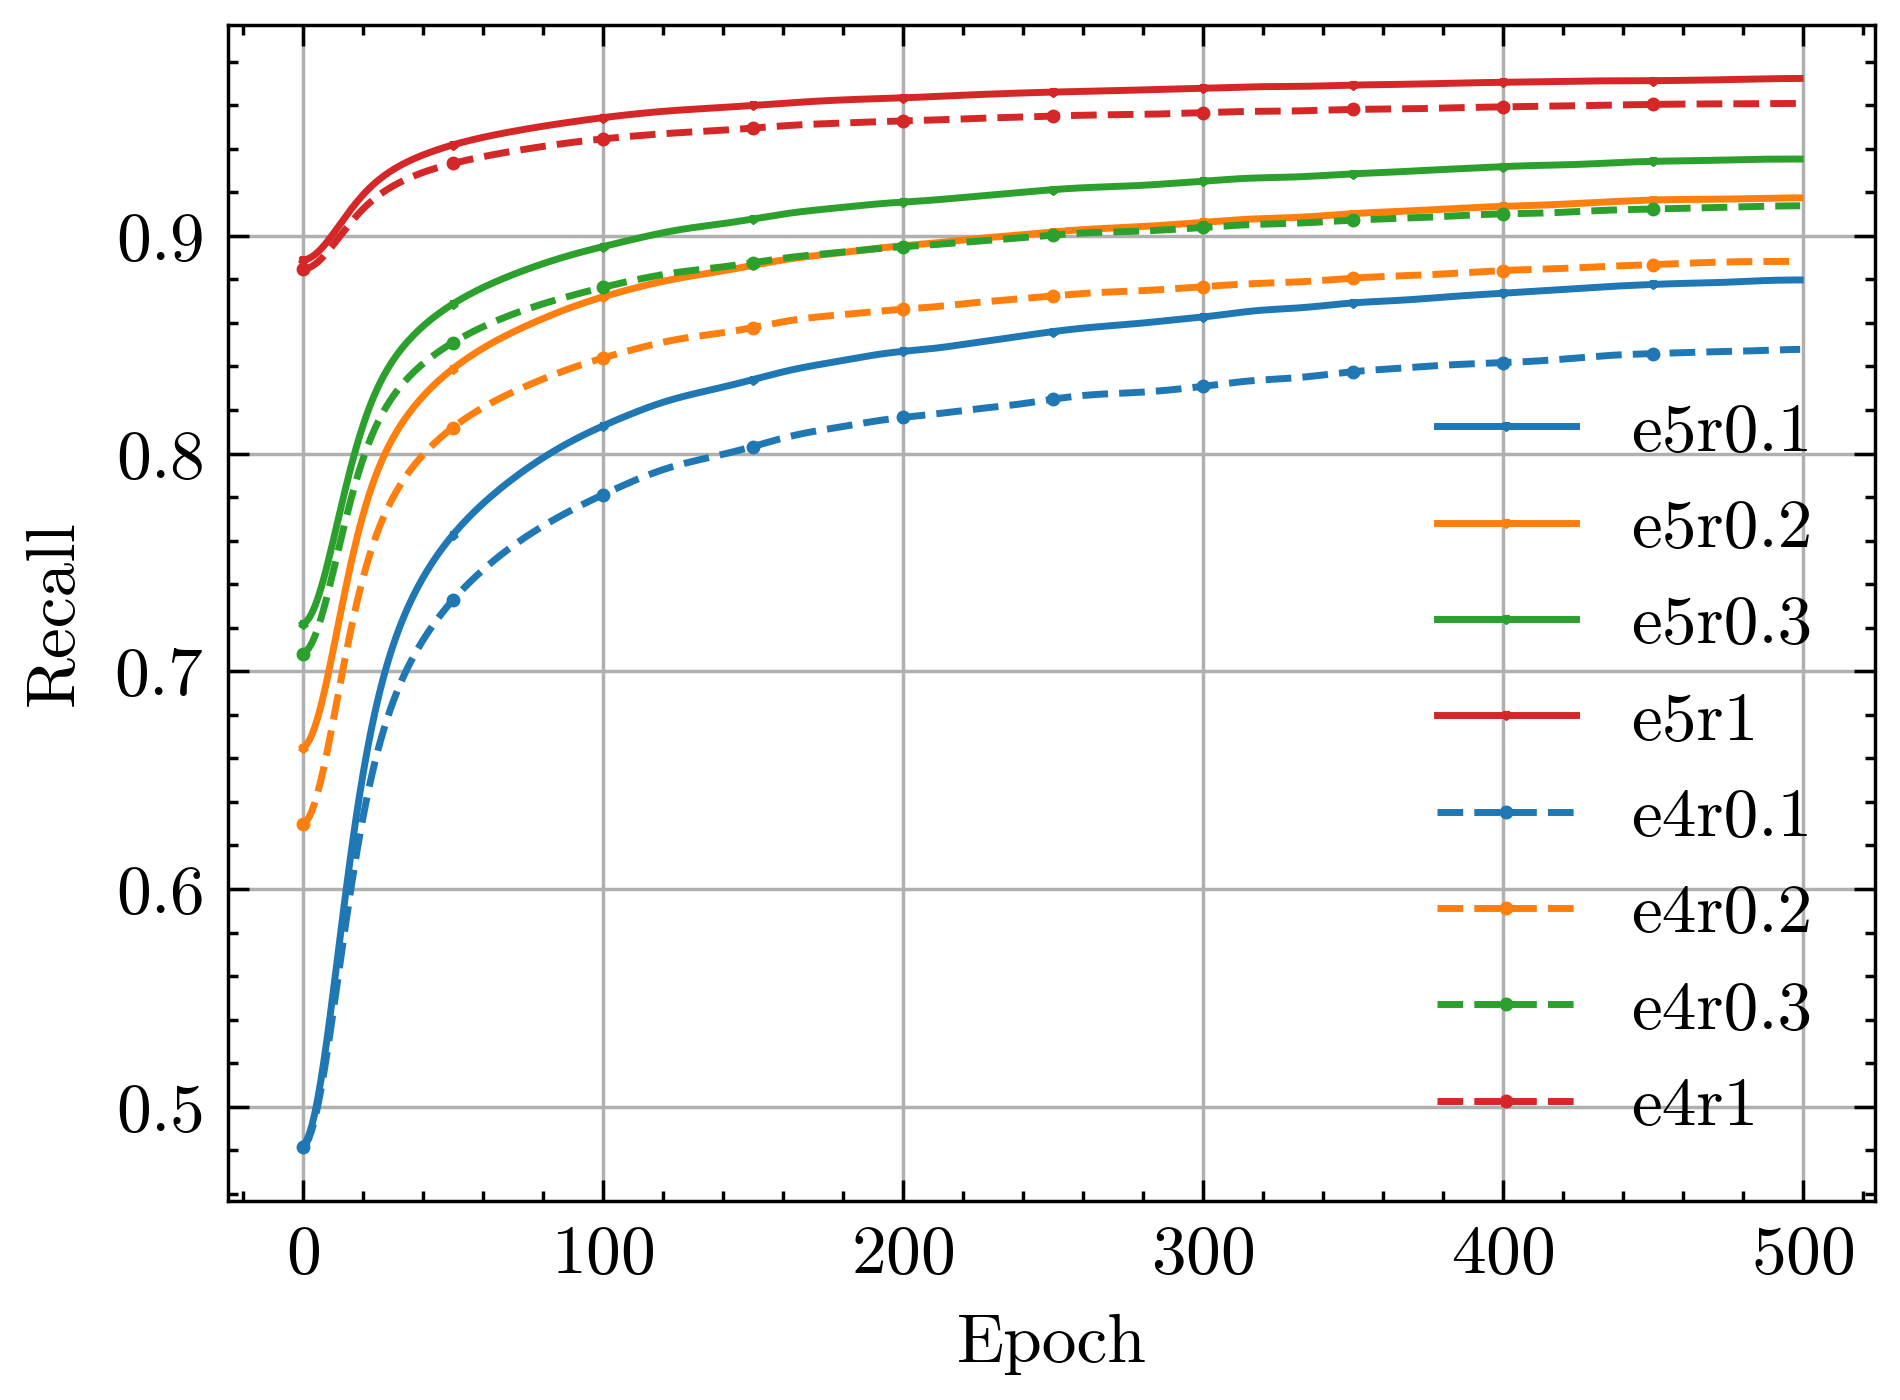

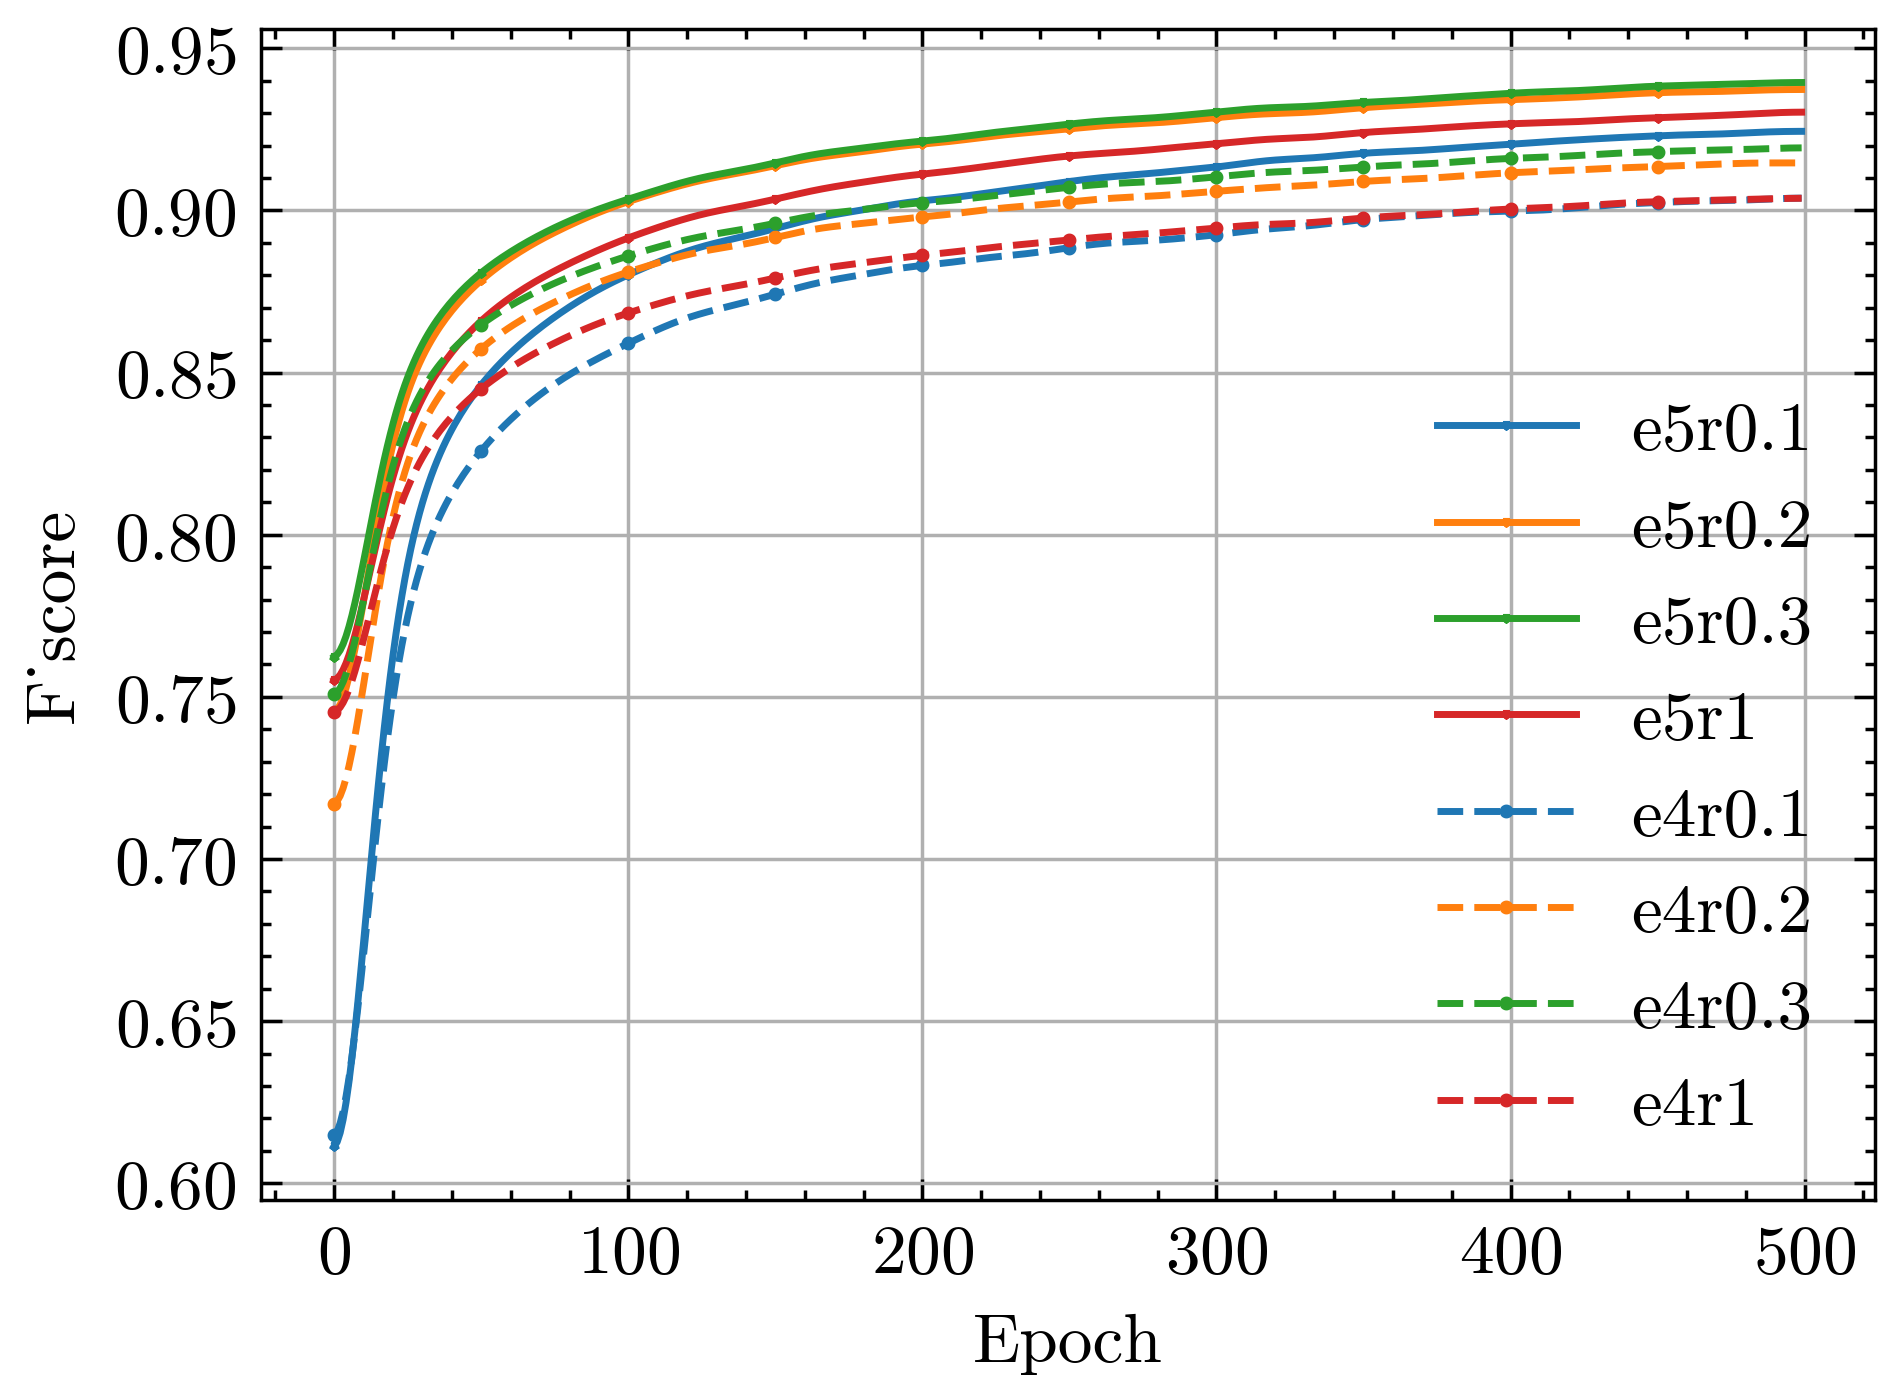

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d
train_history_path_list = [
                            'Run/train/random/ratio1',
                            'Run/train/random/ratio2',
                            'Run/train/random/ratio3',
                            'Run/train/random/ratio10',
                            'Run/train_h8_edge4/random/ratio1',
                            'Run/train_h8_edge4/random/ratio2',
                            'Run/train_h8_edge4/random/ratio3',
                            'Run/train_h8_edge4/random/ratio10',
                            
                          ]


legend = ['e5r0.1','e5r0.2','e5r0.3','e5r1','e4r0.1','e4r0.2','e4r0.3','e4r1']
color_map = {'r0.1': 'tab:blue', 'r0.2': 'tab:orange', 'r0.3': 'tab:green', 'r1': 'tab:red'}
marker_map = {'e4': 'o', 'e5': '*'}
linestyle_map = {'e4': '--', 'e5': '-'}
y_label = ['Loss','Accuracy','Precision','Recall','F_score']
y_key = ['loss','acc','precision','recall','f_score']
compare_values = pd.DataFrame()
for j in range(len(y_label)):

    plt.style.use(['science','no-latex'])
    plt.figure(figsize=(4, 3), dpi=500)
    
    for i, path in enumerate(train_history_path_list):
        df = pd.read_csv(path + '/model/train_history.txt', sep=" ", header=None)
        df.columns = ["epoch","loss","acc","precision","recall","FPR","f_score","TPR"]
        if j==0:
            epoch_max = int(df['epoch'].max())
            df_i = df[df['epoch'] == epoch_max].copy()
            df_i.loc[:, 'label'] = legend[i]
            compare_values = pd.concat([compare_values, df_i], ignore_index=True)
            
        label = legend[i]
        h = label[:2]    # h1 or h8
        r = 'r' + label.split('r')[1]  # r0.1, r0.2, etc.
        smoothed = gaussian_filter1d(df[y_key[j]], sigma=10)
        plt.plot(df['epoch'], smoothed,
             label=label,
             color=color_map[r],
             marker=marker_map[h],
             linestyle=linestyle_map[h],
             markevery=50,
             linewidth=1,
             markersize=1)
    
    plt.xlabel('Epoch')
    plt.ylabel(y_label[j])
    plt.grid(True)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("paper_plots/EdgeCompare/"+str(y_label[j])+".png", dpi=500, bbox_inches='tight')
    plt.show()

compare_values['edge'] = compare_values['label'].str.extract(r'e(\d+)').astype(int)
compare_values['ratio'] = compare_values['label'].str.extract(r'r(\d(?:\.\d)?)')[0].astype(float)

In [97]:
compare_values

,epoch,loss,acc,precision,recall,FPR,f_score,TPR,label,edge,ratio
0,499.0,0.053,0.963,0.974,0.880,0.008,0.924,0.880,e5r0.1,5,0.1
1,499.0,0.069,0.969,0.958,0.918,0.014,0.938,0.918,e5r0.2,5,0.2
2,499.0,0.080,0.969,0.943,0.935,0.020,0.939,0.935,e5r0.3,5,0.3
3,499.0,0.093,0.962,0.892,0.972,0.041,0.931,0.972,e5r1,5,1.0
4,499.0,0.065,0.954,0.968,0.850,0.010,0.905,0.850,e4r0.1,4,0.1
5,499.0,0.092,0.958,0.944,0.890,0.018,0.916,0.890,e4r0.2,4,0.2
6,499.0,0.105,0.959,0.925,0.915,0.026,0.920,0.915,e4r0.3,4,0.3
7,499.0,0.127,0.948,0.854,0.961,0.057,0.905,0.961,e4r1,4,1.0


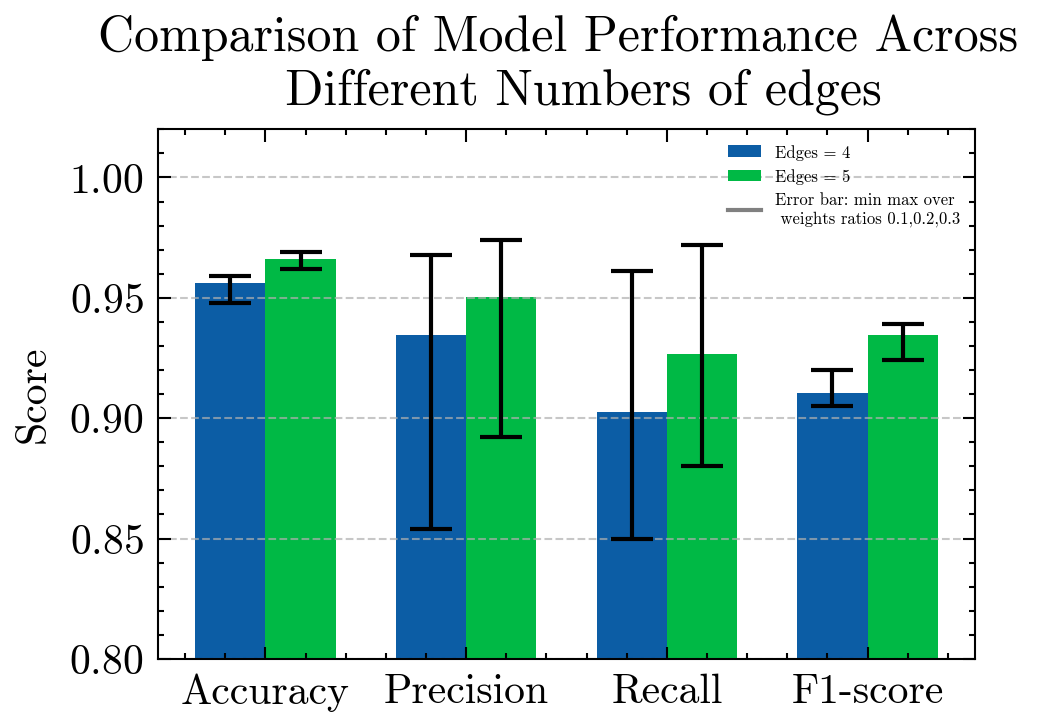

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
# Raw data
data = {
    'edges': [5, 5, 5, 5, 4, 4, 4, 4],
    'ratio': [0.1, 0.2, 0.3, 1.0, 0.1, 0.2, 0.3, 1.0],
    'Accuracy': [0.963, 0.969, 0.969, 0.962, 0.954, 0.958, 0.959, 0.948],
    'Precision': [0.974, 0.958, 0.943, 0.892, 0.968, 0.944, 0.925, 0.854],
    'Recall': [0.880, 0.918, 0.935, 0.972, 0.850, 0.890, 0.915, 0.961],
    'F1-score': [0.924, 0.938, 0.939, 0.931, 0.905, 0.916, 0.920, 0.905],
}

df = pd.DataFrame(data)

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))
width = 0.35

# Compute mean, min, and max for each metric by heads
means = df.groupby('edges')[metrics].median()
mins = df.groupby('edges')[metrics].min()
maxs = df.groupby('edges')[metrics].max()

# Compute asymmetric error bars (top = max - mean, bottom = mean - min)
yerr_4 = np.vstack((means.loc[4] - mins.loc[4], maxs.loc[4] - means.loc[4]))
yerr_5 = np.vstack((means.loc[5] - mins.loc[5], maxs.loc[5] - means.loc[5]))




fig, ax = plt.subplots( dpi=300)
plt.style.use(['science','no-latex'])
rects1 = ax.bar(x - width/2, means.loc[4], width, yerr=yerr_4, capsize=5, label='Edges = 4')
rects2 = ax.bar(x + width/2, means.loc[5], width, yerr=yerr_5, capsize=5, label='Edges = 5')


custom_legend = [Line2D([0], [0], color='gray', lw=1, label='Error bar: min max over \n weights ratios 0.1,0.2,0.3')]
ax.legend(handles=[rects1, rects2] + custom_legend, loc='upper right', fontsize=4)
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Across \n  Different Numbers of edges')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.8, 1.02)

# ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
# ax.grid(True, alpha=0.7)

plt.tight_layout()
plt.savefig("paper_plots/EdgeCompare/bar.png", dpi=500, bbox_inches='tight')
plt.show()



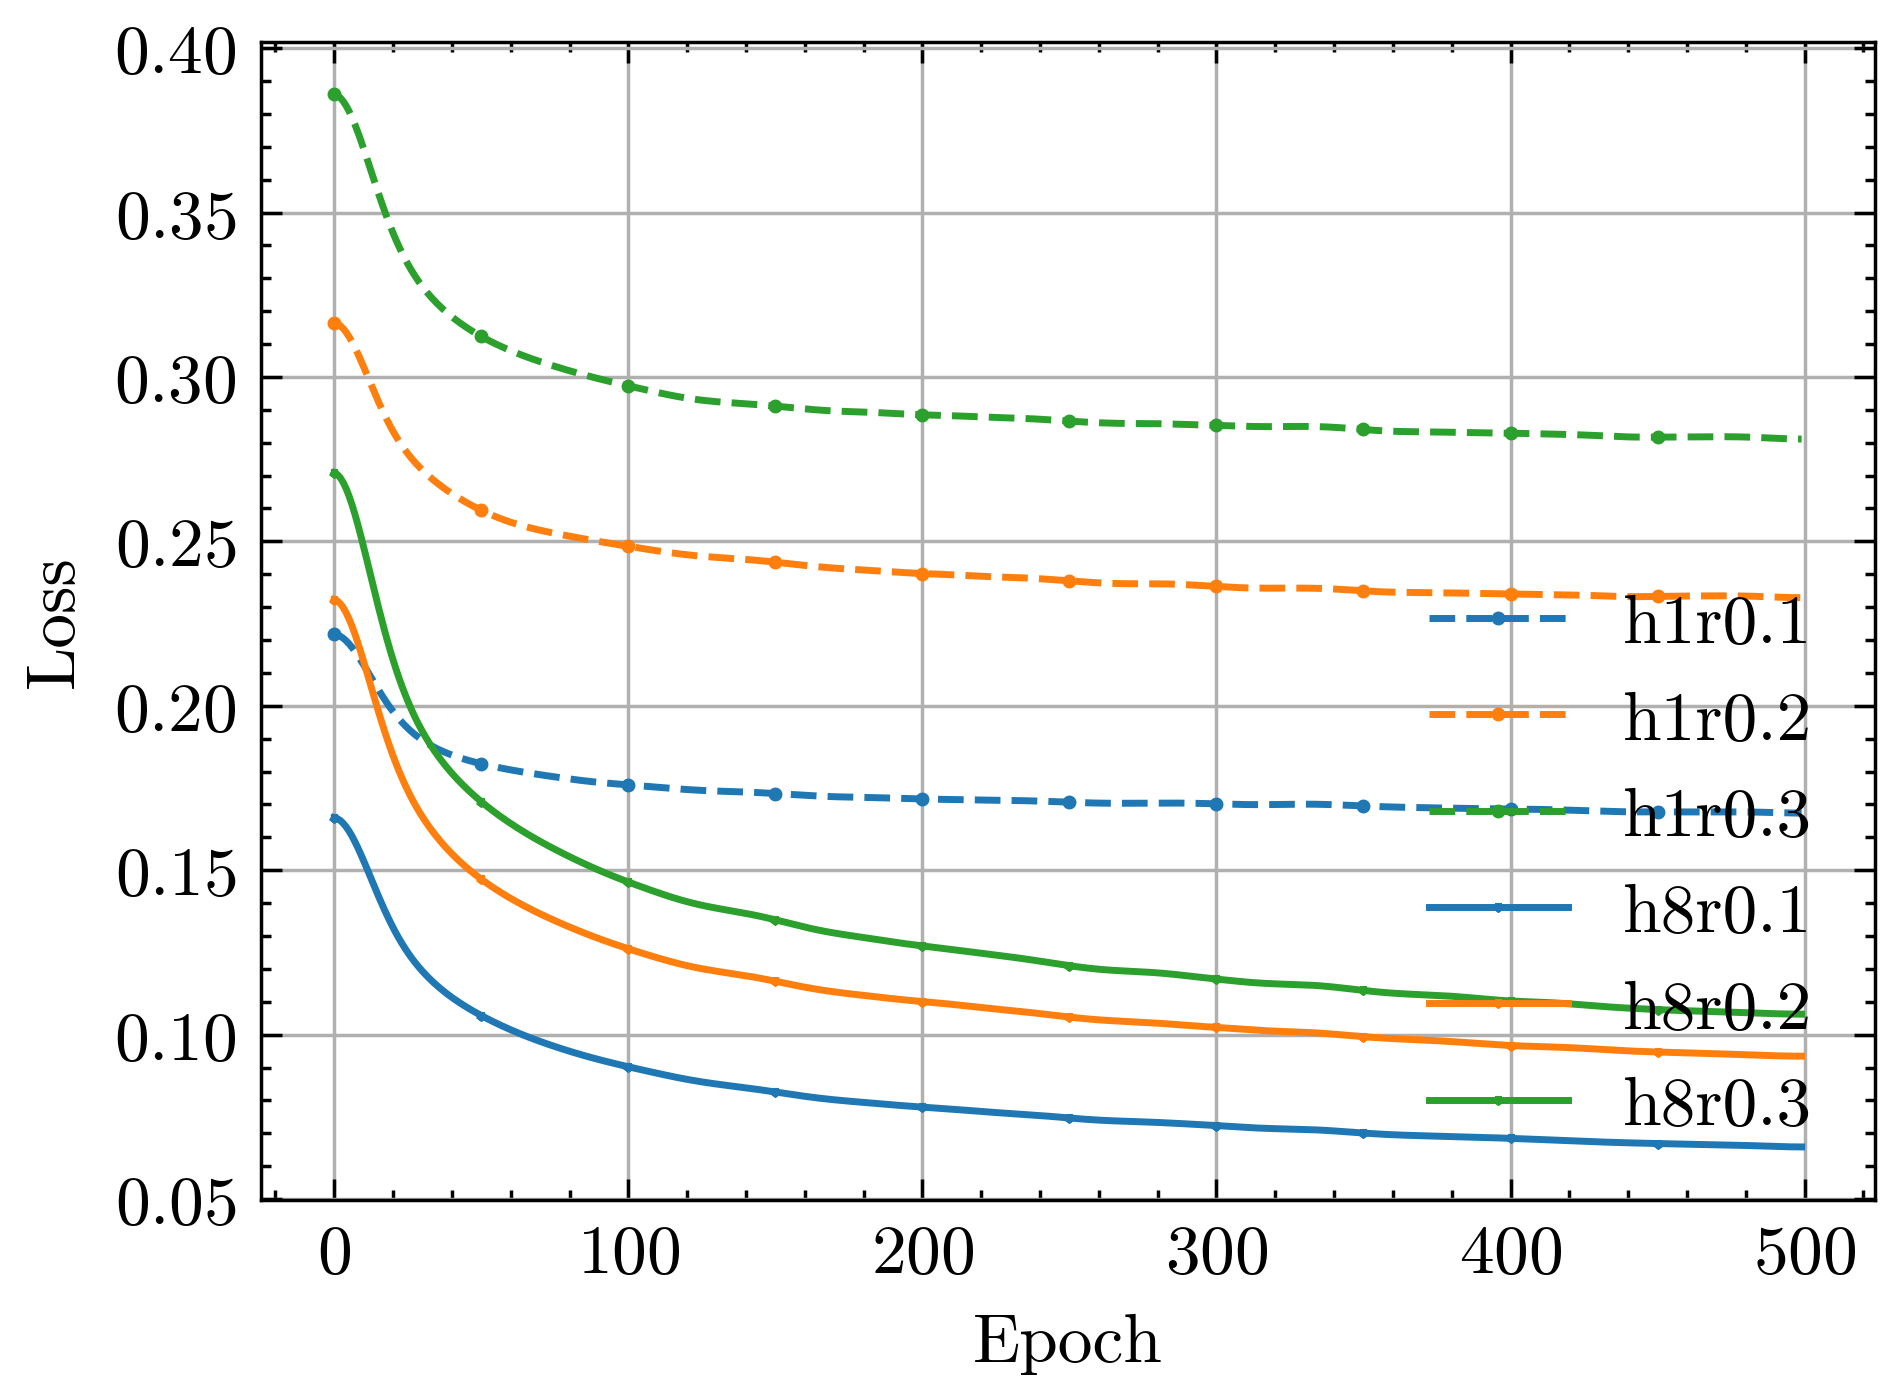

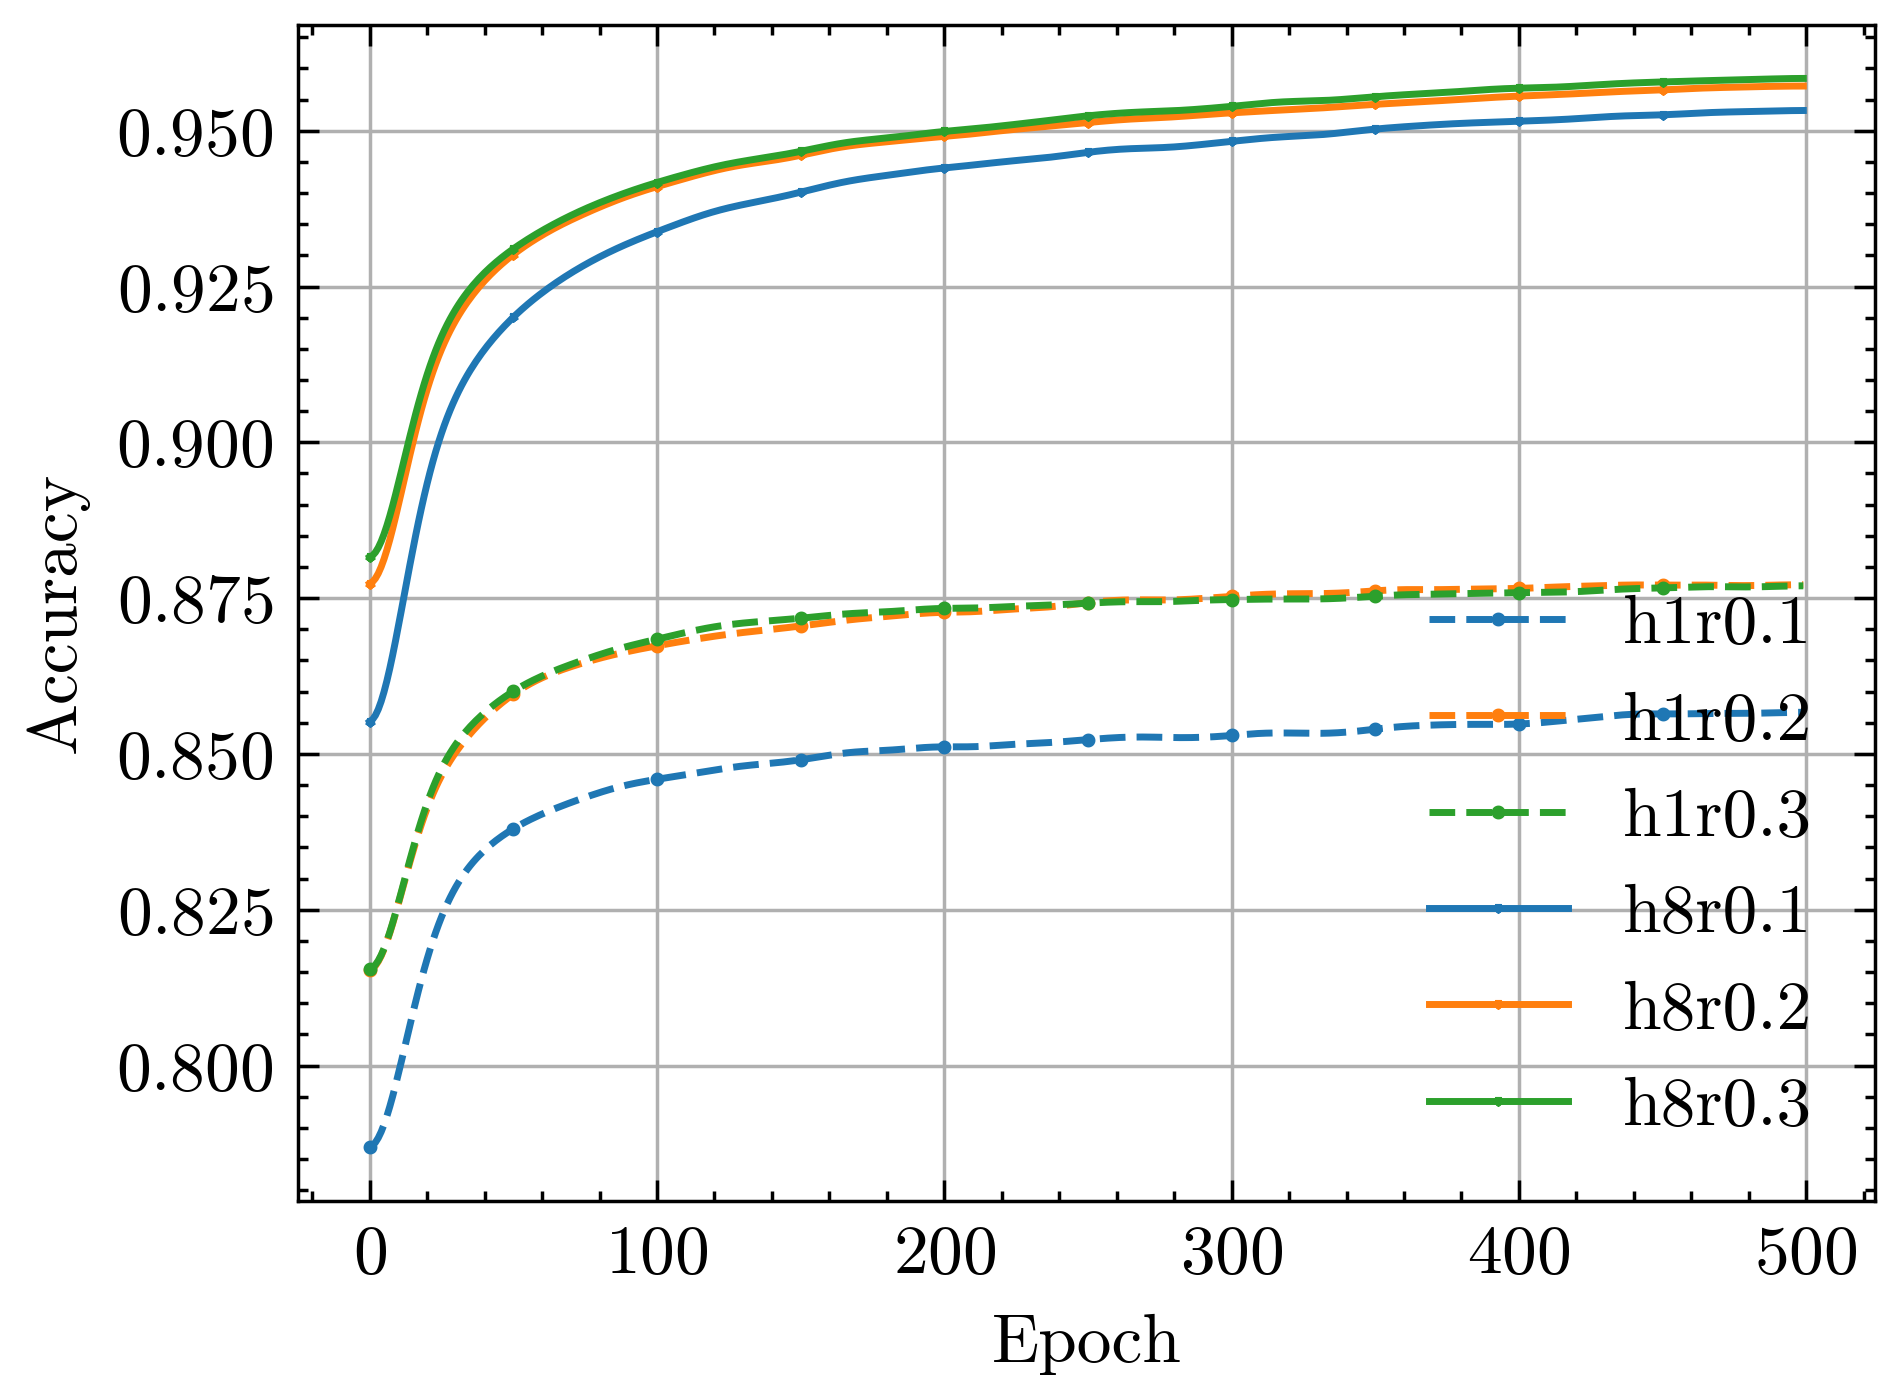

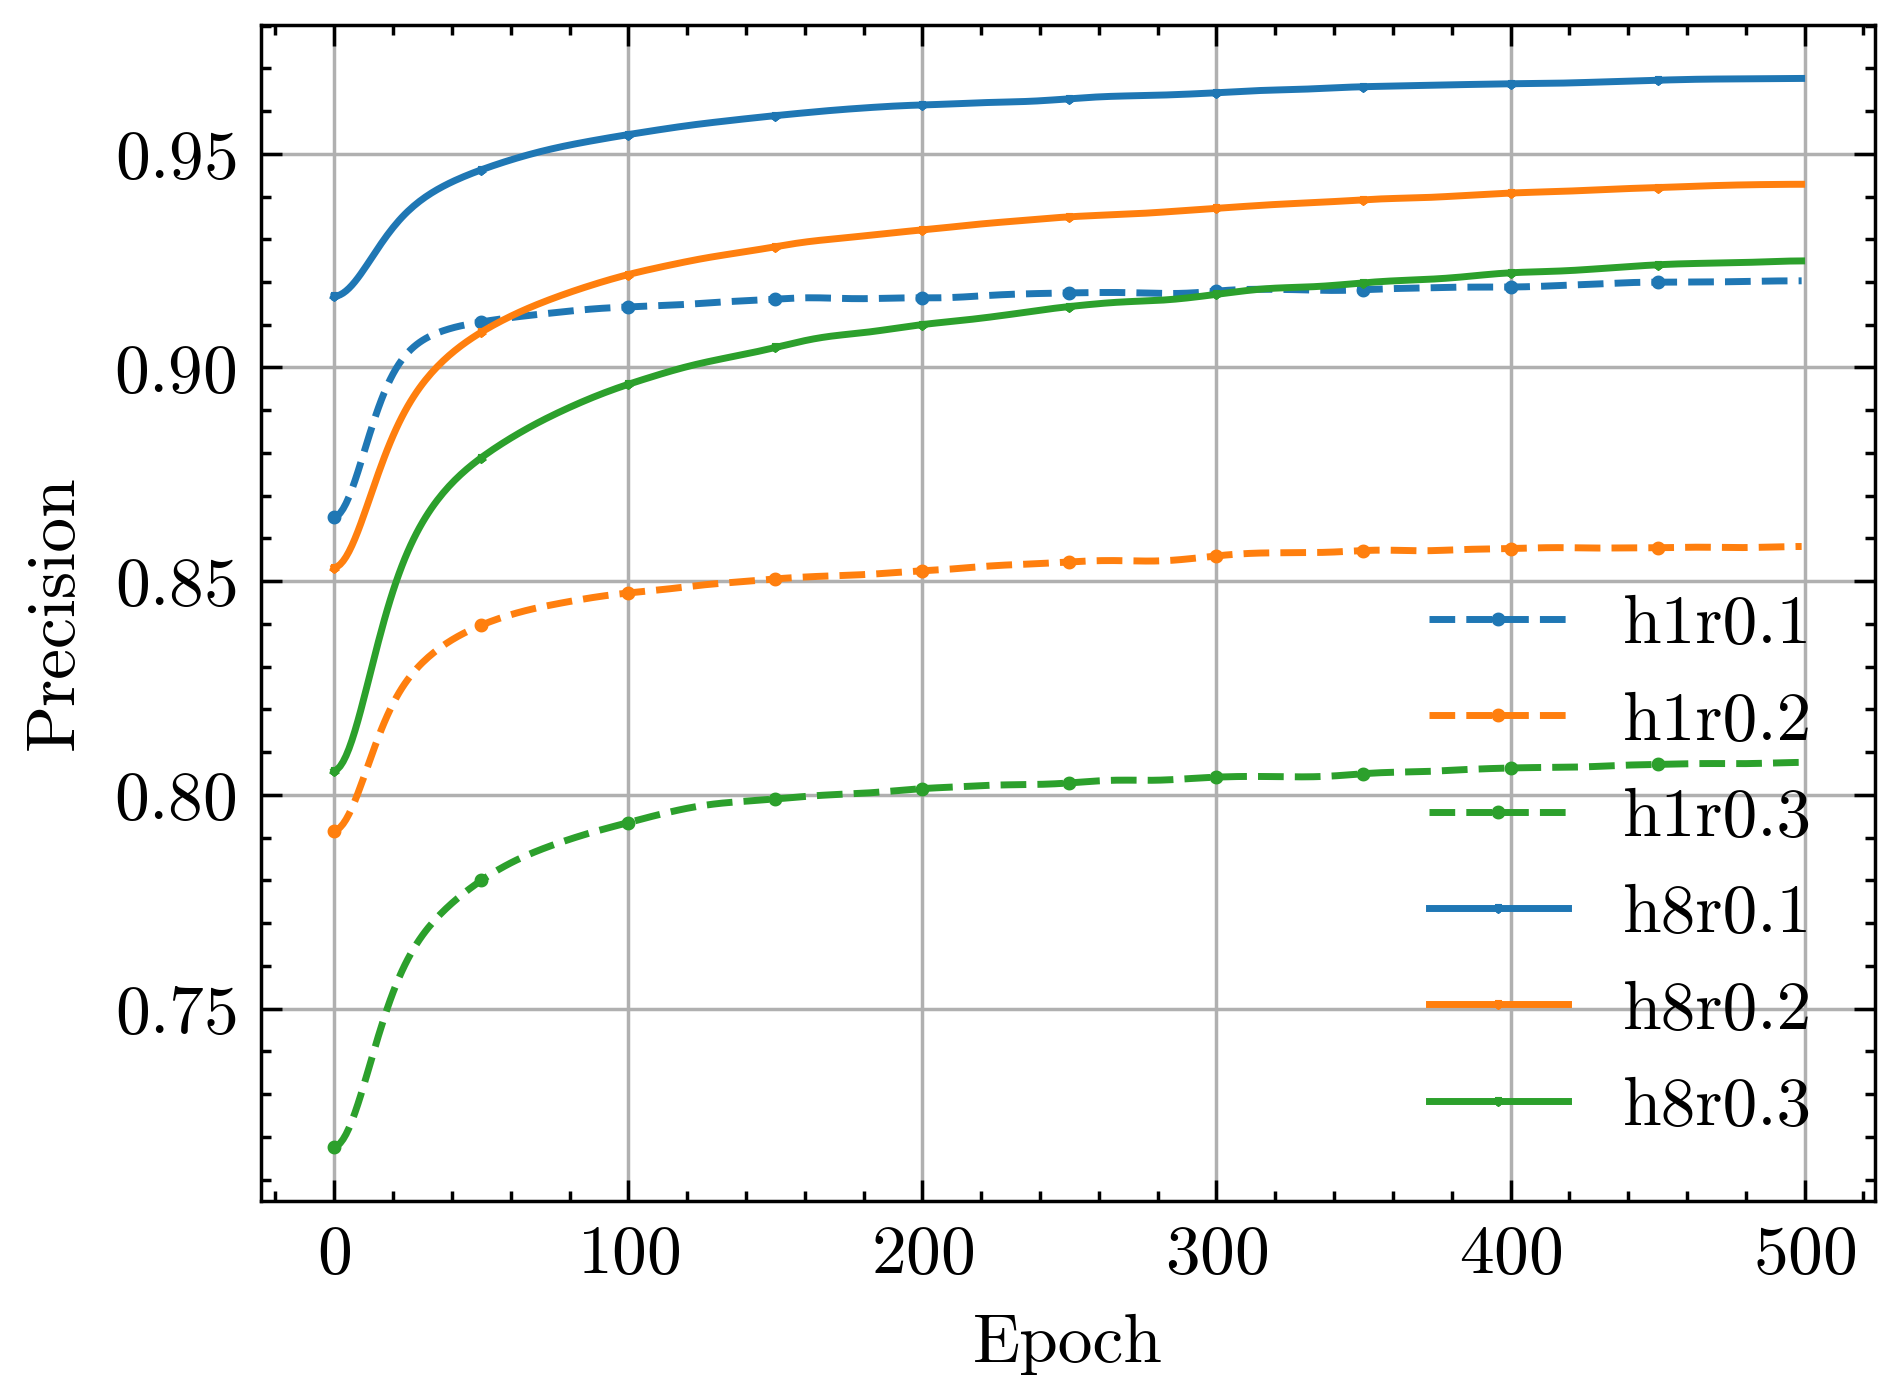

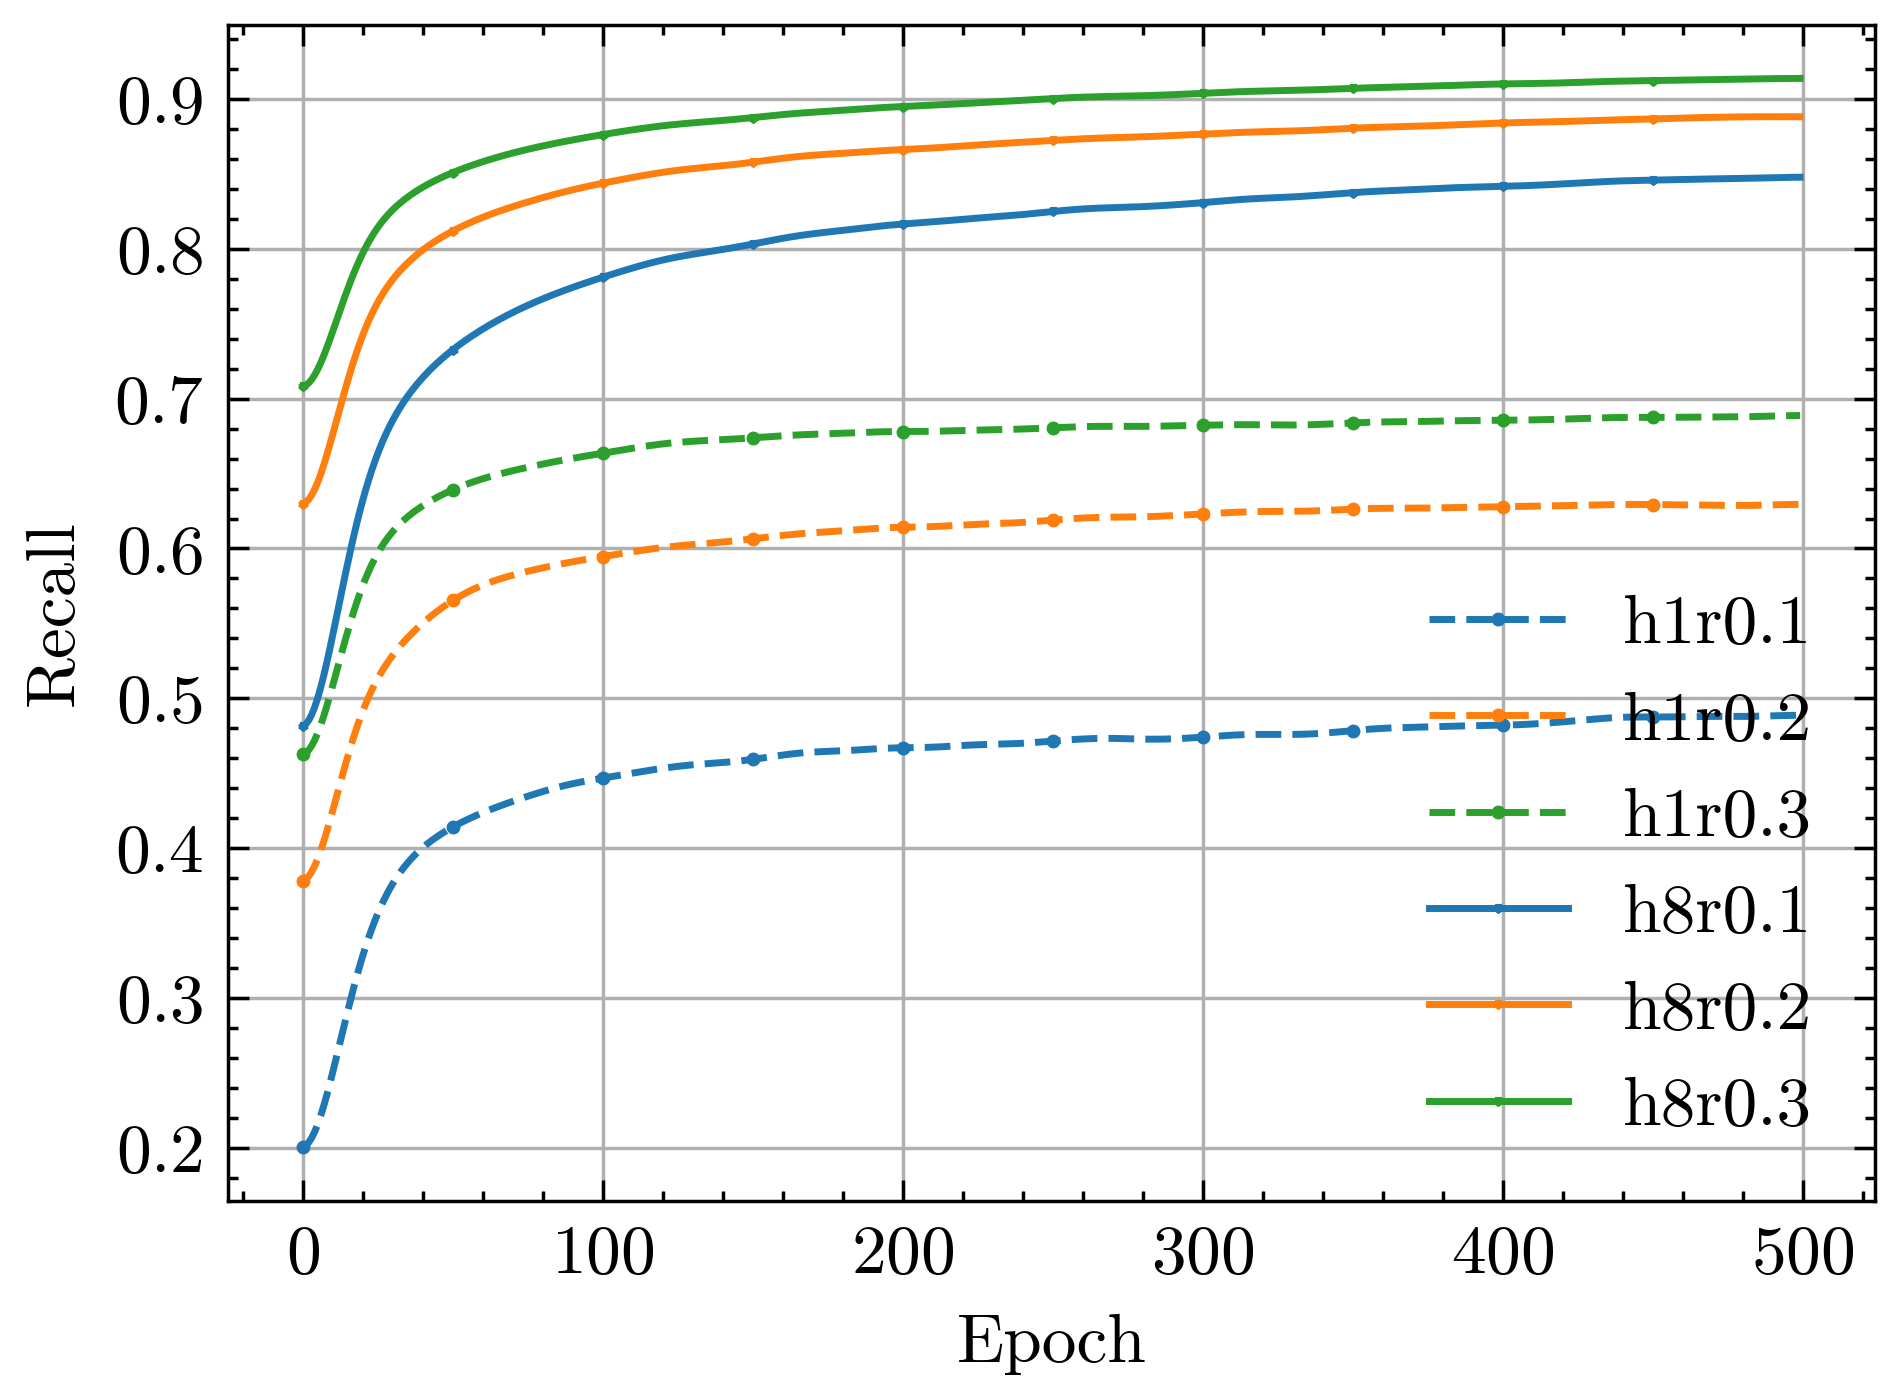

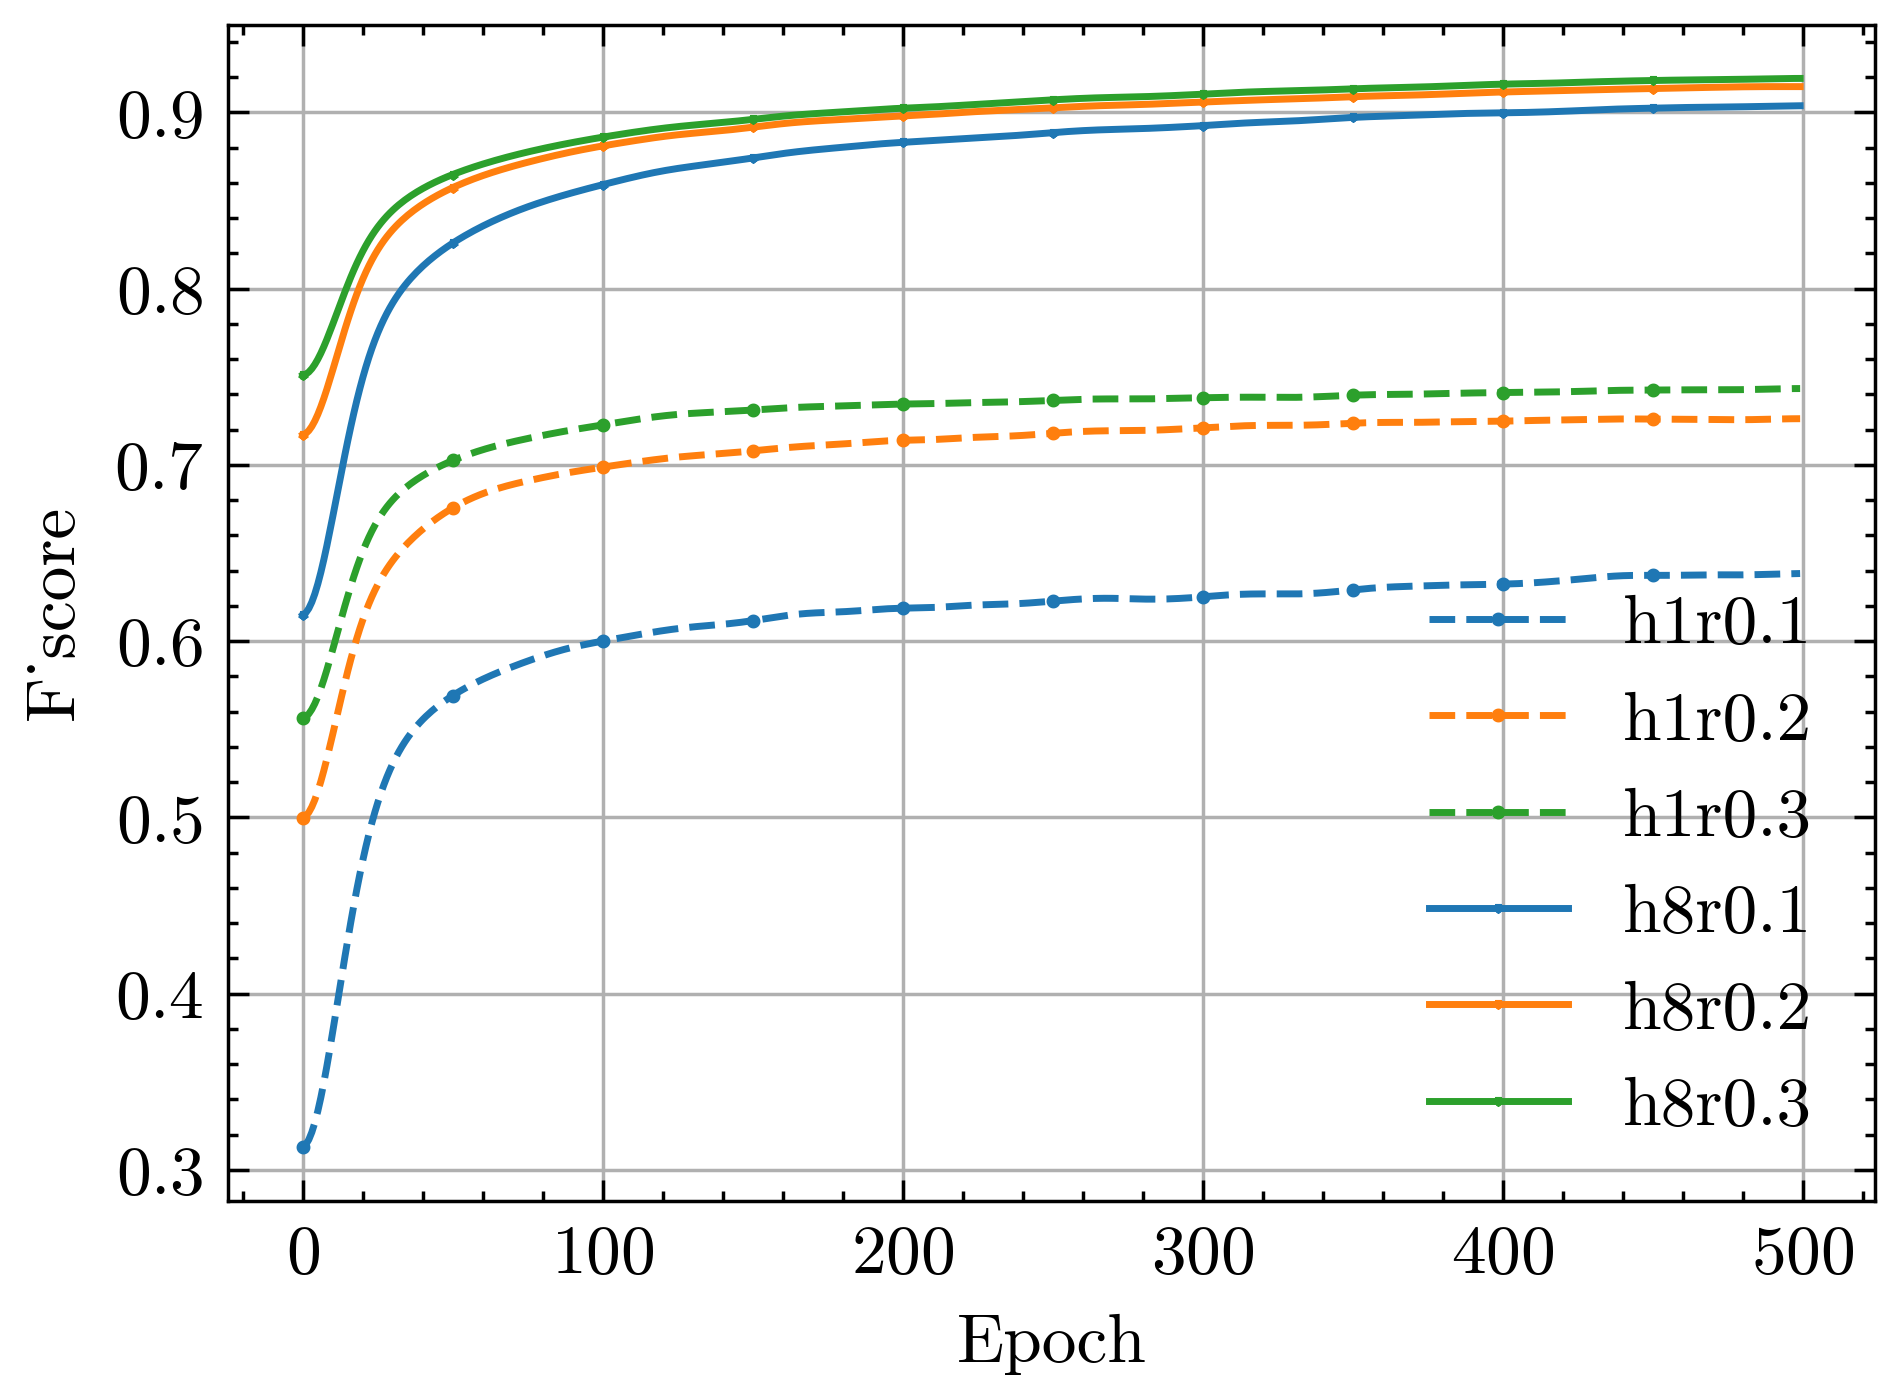

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d
train_history_path_list = [
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h1_edge4/random/ratio1',
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h1_edge4/random/ratio2',
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h1_edge4/random/ratio3',
                            # '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h1_edge4/random/ratio10',
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h8_edge4/random/ratio1',
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h8_edge4/random/ratio2',
                            '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h8_edge4/random/ratio3',
                            # '/work/venkatachalamlab/Hang/00Neuron_tracking_version2/02version/Run/train_h8_edge4/random/ratio10',
                            
                          ]


legend = ['h1r0.1','h1r0.2','h1r0.3','h8r0.1','h8r0.2','h8r0.3',]
color_map = {'r0.1': 'tab:blue', 'r0.2': 'tab:orange', 'r0.3': 'tab:green', 'r1': 'tab:red'}
marker_map = {'h1': 'o', 'h8': '*'}
linestyle_map = {'h1': '--', 'h8': '-'}
y_label = ['Loss','Accuracy','Precision','Recall','F_score']
y_key = ['loss','acc','precision','recall','f_score']
compare_values = pd.DataFrame()
for j in range(len(y_label)):

    plt.style.use(['science','no-latex'])
    plt.figure(figsize=(4, 3), dpi=500)
    
    for i, path in enumerate(train_history_path_list):
        df = pd.read_csv(path + '/model/train_history.txt', sep=" ", header=None)
        df.columns = ["epoch","loss","acc","precision","recall","FPR","f_score","TPR"]
        if j==0:
            epoch_max = int(df['epoch'].max())
            df_i = df[df['epoch'] == epoch_max].copy()
            df_i.loc[:, 'label'] = legend[i]
            compare_values = pd.concat([compare_values, df_i], ignore_index=True)
    
        label = legend[i]
        h = label[:2]    # h1 or h8
        r = 'r' + label.split('r')[1]  # r0.1, r0.2, etc.
        smoothed = gaussian_filter1d(df[y_key[j]], sigma=10)
        plt.plot(df['epoch'], smoothed,
             label=label,
             color=color_map[r],
             marker=marker_map[h],
             linestyle=linestyle_map[h],
             markevery=50,
             linewidth=1,
             markersize=1)
    
    plt.xlabel('Epoch')
    plt.ylabel(y_label[j])
    plt.grid(True)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("paper_plots/HeadsCompare/"+str(y_label[j])+".png", dpi=500, bbox_inches='tight')
    plt.show()

compare_values['heads'] = compare_values['label'].str.extract(r'h(\d+)').astype(int)
compare_values['ratio'] = compare_values['label'].str.extract(r'r0\.(\d)').astype(int)

In [99]:
compare_values['heads'] = compare_values['label'].str.extract(r'h(\d+)').astype(int)
compare_values['ratio'] = compare_values['label'].str.extract(r'r0\.(\d)').astype(int)
compare_values

,epoch,loss,acc,precision,recall,FPR,f_score,TPR,label,heads,ratio
0,499.0,0.167,0.857,0.920,0.488,0.015,0.638,0.488,h1r0.1,1,1
1,499.0,0.232,0.877,0.857,0.630,0.037,0.727,0.630,h1r0.2,1,2
2,499.0,0.279,0.878,0.808,0.690,0.057,0.744,0.690,h1r0.3,1,3
3,499.0,0.065,0.954,0.968,0.850,0.010,0.905,0.850,h8r0.1,8,1
4,499.0,0.092,0.958,0.944,0.890,0.018,0.916,0.890,h8r0.2,8,2
5,499.0,0.105,0.959,0.925,0.915,0.026,0.920,0.915,h8r0.3,8,3


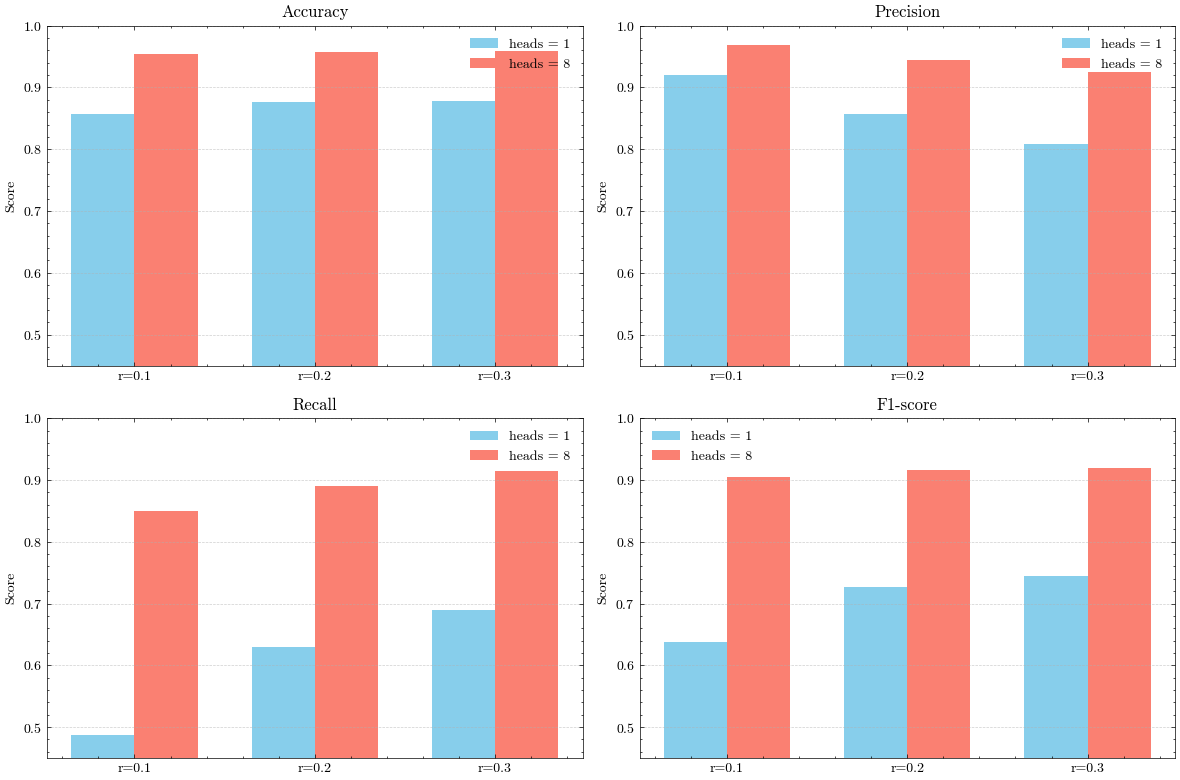

In [169]:

# Raw data
data = {
    'heads': [1, 1, 1, 8, 8, 8],
    'ratio': [1, 2, 3, 1, 2, 3],
    'Accuracy': [0.857, 0.877, 0.878, 0.954, 0.958, 0.959],
    'Precision': [0.920, 0.857, 0.808, 0.968, 0.944, 0.925],
    'Recall': [0.488, 0.630, 0.690, 0.850, 0.890, 0.915],
    'F1-score': [0.638, 0.727, 0.744, 0.905, 0.916, 0.920],
}
df = pd.DataFrame(data)

# Set up plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
ratios = sorted(df['ratio'].unique())
head_types = sorted(df['heads'].unique())
colors = {1: 'skyblue', 8: 'salmon'}
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, metric in enumerate(metrics):
    ax = axs[i]
    x = np.arange(len(ratios))
    for j, head in enumerate(head_types):
        subset = df[df['heads'] == head]
        means = [subset[subset['ratio'] == r][metric].mean() for r in ratios]
        stds = [subset[subset['ratio'] == r][metric].std() for r in ratios]
        ax.bar(x + j*width - width/2, means, width=width, yerr=stds,
               label=f'heads = {head}', color=colors[head], capsize=5)
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels([f'r=0.{r}' for r in ratios])
    ax.set_ylim(0.45, 1)
    ax.set_ylabel('Score')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()

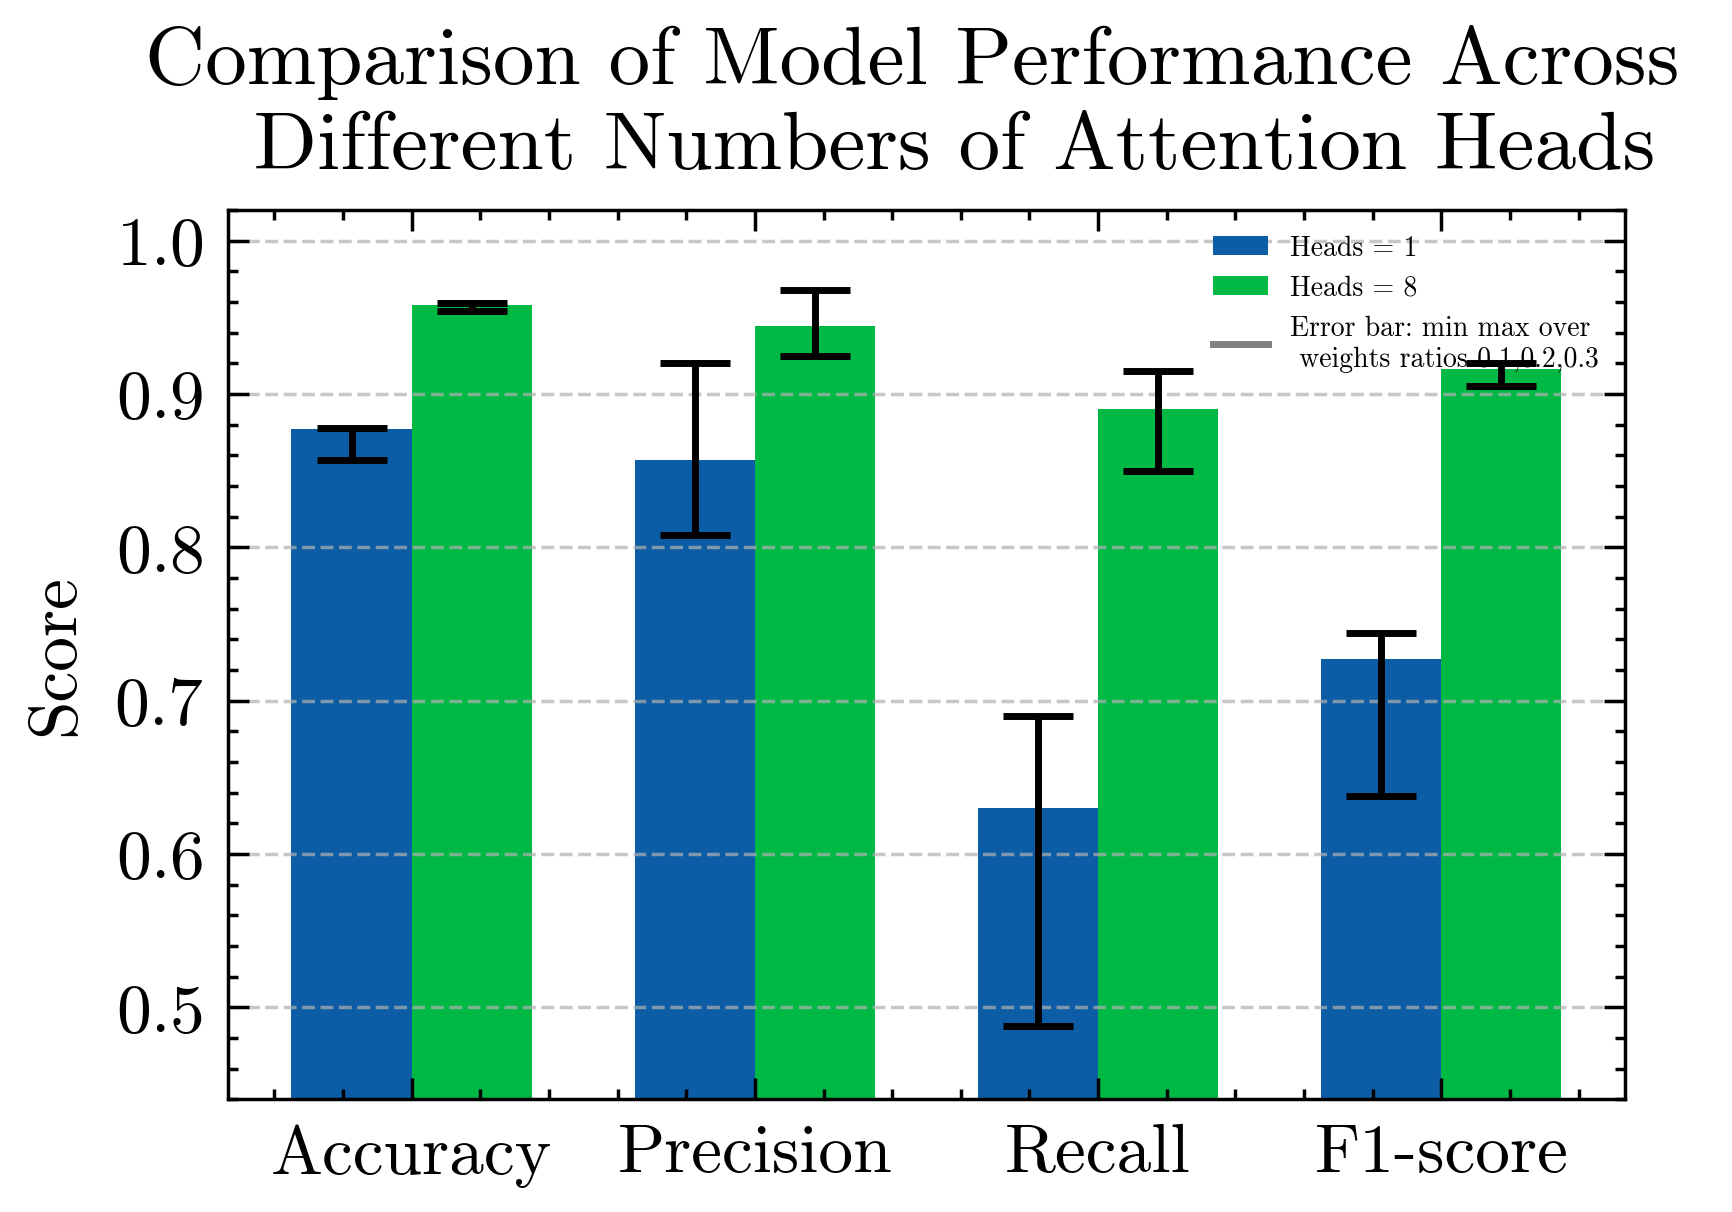

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
# Raw data
data = {
    'heads': [1, 1, 1, 8, 8, 8],
    'ratio': [1, 2, 3, 1, 2, 3],
    'Accuracy': [0.857, 0.877, 0.878, 0.954, 0.958, 0.959],
    'Precision': [0.920, 0.857, 0.808, 0.968, 0.944, 0.925],
    'Recall': [0.488, 0.630, 0.690, 0.850, 0.890, 0.915],
    'F1-score': [0.638, 0.727, 0.744, 0.905, 0.916, 0.920],
}

df = pd.DataFrame(data)

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))
width = 0.35

# Compute mean, min, and max for each metric by heads
means = df.groupby('heads')[metrics].median()
mins = df.groupby('heads')[metrics].min()
maxs = df.groupby('heads')[metrics].max()

# Compute asymmetric error bars (top = max - mean, bottom = mean - min)
yerr_1 = np.vstack((means.loc[1] - mins.loc[1], maxs.loc[1] - means.loc[1]))
yerr_8 = np.vstack((means.loc[8] - mins.loc[8], maxs.loc[8] - means.loc[8]))





fig, ax = plt.subplots( dpi=500)
plt.style.use(['science','no-latex'])
rects1 = ax.bar(x - width/2, means.loc[1], width, yerr=yerr_1, capsize=5, label='Heads = 1')
rects2 = ax.bar(x + width/2, means.loc[8], width, yerr=yerr_8, capsize=5, label='Heads = 8')



custom_legend = [Line2D([0], [0], color='gray', lw=1, label='Error bar: min max over \n weights ratios 0.1,0.2,0.3')]
ax.legend(handles=[rects1, rects2] + custom_legend, loc='upper right', fontsize=4)
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Across \n  Different Numbers of Attention Heads')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.44, 1.02)

# ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
# ax.grid(True, alpha=0.7)

plt.tight_layout()
plt.savefig("paper_plots/HeadsCompare/bar.png", dpi=500, bbox_inches='tight')
plt.show()



In [171]:
pwd

'/work/venkatachalamlab/Hang/00Neuron_tracking_version2/01version/Matching_anchor/Eval'